First decompress the data

In [1]:
import zipfile

with zipfile.ZipFile('lrf_wrp_2021_full_data.zip', 'r') as infile:
    infile.extractall()

In [2]:
import pandas as pd

data = pd.read_csv('lrf_wrp_2021_full_data.csv')

/tmp/ipykernel_294814/439441871.py:3: DtypeWarning: Columns (7,8,9,10,16,17,20,21,22,28,31,32,33,34,35,36,37,38,41,43,46,47,48,49,50,51,52,53,54,56,57,58,59,60,66,67,68,69,70,71,72,73,74,75,76,77,78,81,84,101,224,226,227,228,229,230) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lrf_wrp_2021_full_data.csv')


In [3]:
synonyms = {
    "congo brazzaville":"democratic republic congo",
    "czech republic":"czechia",
    "ivory coast":"cote d'ivoire",
    "united states": "united states america"
}
two_letter_codes = {None:None, 'yu': 'serbia', 'cs' : 'serbia', 'an' : 'netherlands antilles', 'xk' : 'kosovo', 'bo': 'bolivia', 'af': 'afghanistan', 'al': 'albania', 'dz': 'algeria', 'as': 'american samoa', 'ad': 'andorra', 'ao': 'angola', 'ai': 'anguilla', 'aq': 'antarctica', 'ag': 'antigua barbuda', 'ar': 'argentina', 'am': 'armenia', 'aw': 'aruba', 'au': 'australia', 'at': 'austria', 'az': 'azerbaijan', 'bs': 'bahamas', 'bh': 'bahrain', 'bd': 'bangladesh', 'bb': 'barbados', 'by': 'belarus', 'be': 'belgium', 'bz': 'belize', 'bj': 'benin', 'bm': 'bermuda', 'bt': 'bhutan', 've': 'venezuela', 'bo': 'bolivia','bq': 'bonaire sint eustatius saba', 'ba': 'bosnia herzegovina', 'bw': 'botswana', 'bv': 'bouvet island', 'br': 'brazil', 'io': 'british indian ocean territory', 'bn': 'brunei darussalam', 'bg': 'bulgaria', 'bf': 'burkina faso', 'bi': 'burundi', 'cv': 'cabo verde', 'kh': 'cambodia', 'cm': 'cameroon', 'ca': 'canada', 'ky': 'cayman', 'cf': 'central african republic', 'td': 'chad', 'cl': 'chile', 'cn': 'china', 'cx': 'christmas island', 'cc': 'cocos keeling', 'co': 'colombia', 'km': 'comoros', 'cd': 'democratic republic congo', 'cg': 'congo', 'ck': 'cook', 'cr': 'costa rica', 'hr': 'croatia', 'cu': 'cuba', 'cw': 'curacao', 'cy': 'cyprus', 'cz': 'czechia', 'ci': "cote d'ivoire", 'dk': 'denmark', 'dj': 'djibouti', 'dm': 'dominica', 'do': 'dominican republic', 'ec': 'ecuador', 'eg': 'egypt', 'sv': 'el salvador', 'gq': 'equatorial guinea', 'er': 'eritrea', 'ee': 'estonia', 'sz': 'eswatini', 'et': 'ethiopia', 'fk': 'falkland', 'fo': 'faroe', 'fj': 'fiji', 'fi': 'finland', 'fr': 'france', 'gf': 'french guiana', 'pf': 'french polynesia', 'tf': 'french southern antarctic lands', 'ga': 'gabon', 'gm': 'gambia', 'ge': 'georgia', 'de': 'germany', 'gh': 'ghana', 'gi': 'gibraltar', 'gr': 'greece', 'gl': 'greenland', 'gd': 'grenada', 'gp': 'guadeloupe', 'gu': 'guam', 'gt': 'guatemala', 'gg': 'guernsey', 'gn': 'guinea', 'gw': 'guinea bissau', 'gy': 'guyana', 'ht': 'haiti', 'hm': 'heard island mcdonald', 'va': 'holy see', 'hn': 'honduras', 'hk': 'hong kong', 'hu': 'hungary', 'is': 'iceland', 'in': 'india', 'id': 'indonesia', 'ir': 'iran', 'iq': 'iraq', 'ie': 'ireland', 'im': 'isle man', 'il': 'israel', 'it': 'italy', 'jm': 'jamaica', 'jp': 'japan', 'je': 'jersey', 'jo': 'jordan', 'kz': 'kazakhstan', 'ke': 'kenya', 'ki': 'kiribati', 'kp': 'north korea', 'kr': 'south korea', 'kw': 'kuwait', 'kg': 'kyrgyzstan', 'la': 'laos', 'lv': 'latvia', 'lb': 'lebanon', 'ls': 'lesotho', 'lr': 'liberia', 'ly': 'libya', 'li': 'liechtenstein', 'lt': 'lithuania', 'lu': 'luxembourg', 'mo': 'macau', 'mg': 'madagascar', 'mw': 'malawi', 'my': 'malaysia', 'mv': 'maldives', 'ml': 'mali', 'mt': 'malta', 'mh': 'marshall', 'mq': 'martinique', 'mr': 'mauritania', 'mu': 'mauritius', 'yt': 'mayotte', 'mx': 'mexico', 'fm': 'micronesia', 'md': 'moldova', 'mc': 'monaco', 'mn': 'mongolia', 'me': 'montenegro', 'ms': 'montserrat', 'ma': 'morocco', 'mz': 'mozambique', 'mm': 'myanmar', 'na': 'namibia', 'nr': 'nauru', 'np': 'nepal', 'nl': 'netherlands', 'nc': 'new caledonia', 'nz': 'new zealand', 'ni': 'nicaragua', 'ne': 'niger', 'ng': 'nigeria', 'nu': 'niue', 'nf': 'norfolk island', 'mp': 'northern mariana', 'no': 'norway', 'om': 'oman', 'pk': 'pakistan', 'pw': 'palau', 'ps': 'palestine', 'pa': 'panama', 'pg': 'papua new guinea', 'py': 'paraguay', 'pe': 'peru', 'ph': 'philippines', 'pn': 'pitcairn', 'pl': 'poland', 'pt': 'portugal', 'pr': 'puerto rico', 'qa': 'qatar', 'mk': 'north macedonia', 'ro': 'romania', 'ru': 'russia', 'rw': 'rwanda', 're': 'reunion', 'bl': 'saint barthelemy', 'sh': 'saint helena', 'kn': 'saint kitts nevis', 'lc': 'saint lucia', 'mf': 'saint martin', 'pm': 'saint pierre miquelon', 'vc': 'saint vincent grenadines', 'ws': 'samoa', 'sm': 'san marino', 'st': 'sao tome principe', 'sa': 'saudi arabia', 'sn': 'senegal', 'rs': 'serbia', 'sc': 'seychelles', 'sl': 'sierra leone', 'sg': 'singapore', 'sx': 'sint maarten', 'sk': 'slovakia', 'si': 'slovenia', 'sb': 'solomon', 'so': 'somalia', 'za': 'south africa', 'gs': 'south georgia south sandwich', 'ss': 'south sudan', 'es': 'spain', 'lk': 'sri lanka', 'sd': 'sudan', 'sr': 'suriname', 'sj': 'svalbard', 'se': 'sweden', 'ch': 'switzerland', 'sy': 'syria', 'tw': 'taiwan', 'tj': 'tajikistan', 'tz': 'tanzania', 'th': 'thailand', 'tl': 'timor leste', 'tg': 'togo', 'tk': 'tokelau', 'to': 'tonga', 'tt': 'trinidad tobago', 'tn': 'tunisia', 'tr': 'turkey', 'tm': 'turkmenistan', 'tc': 'turks caicos', 'tv': 'tuvalu', 'ug': 'uganda', 'ua': 'ukraine', 'ae': 'united arab emirates', 'gb': 'united kingdom', 'um': 'united states minor outlying', 'us': 'united states america', 'uy': 'uruguay', 'uz': 'uzbekistan', 'vu': 'vanuatu', 'vn': 'vietnam', 'vg': 'british virgin', 'vi': 'united states virgin', 'wf': 'wallis futuna', 'eh': 'western sahara', 'ye': 'yemen', 'zm': 'zambia', 'zw': 'zimbabwe', 'ax': 'aland'}
country_to_code = {v:k for k,v in two_letter_codes.items()}
for k,v in synonyms.items(): country_to_code[k] = country_to_code[v]
data['Country'] = data['Country'].str.lower().replace(country_to_code)

print(len(set(data['Country'].values.tolist())))

144


In [4]:
import geopandas as gpd
import geoplot as gplt

/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

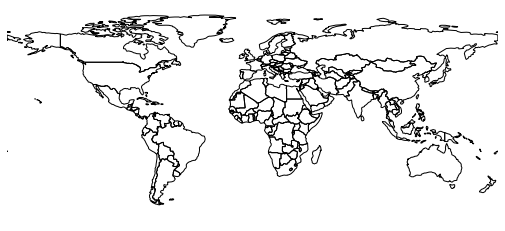

In [5]:
geoData = gpd.read_file('world.json')
gplt.polyplot(geoData, figsize=(20, 4))

In [6]:
synonyms = {
    "the bahamas":"bahamas",
    "trinidad and tobago":"trinidad tobago",
    "falkland islands":"falkland",
    "united states of america": "united states america",
    "east timor": "timor leste",
    "brunei":"brunei darussalam",
    "northern cyprus":"cyprus",
    "solomon islands":"solomon",
    "republic of serbia":"serbia",
    "bosnia and herzegovina":"bosnia herzegovina",
    "united republic of tanzania":"tanzania",
    "somaliland":"somalia",
    "republic of the congo":"congo",
    "democratic republic of the congo":"democratic republic congo",
    "guinea-bissau":"guinea bissau"
}
for k,v in synonyms.items(): country_to_code[k] = country_to_code[v]
geoData['admin'] = geoData['admin'].str.lower().replace(country_to_code)


/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

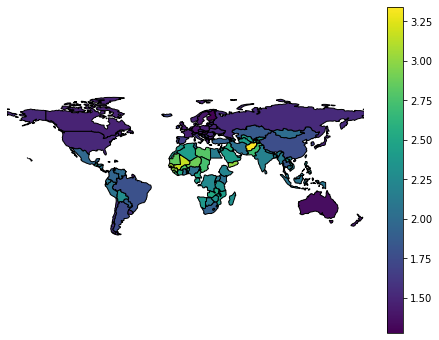

In [7]:
household = data[['Country','HouseholdSize']].groupby('Country').mean()
fullData = geoData.merge(household, left_on=['admin'], right_on=['Country'])
gplt.choropleth(fullData, hue='HouseholdSize', legend=True)

### Climate Change a Threat to Country in Next 20 Years

/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

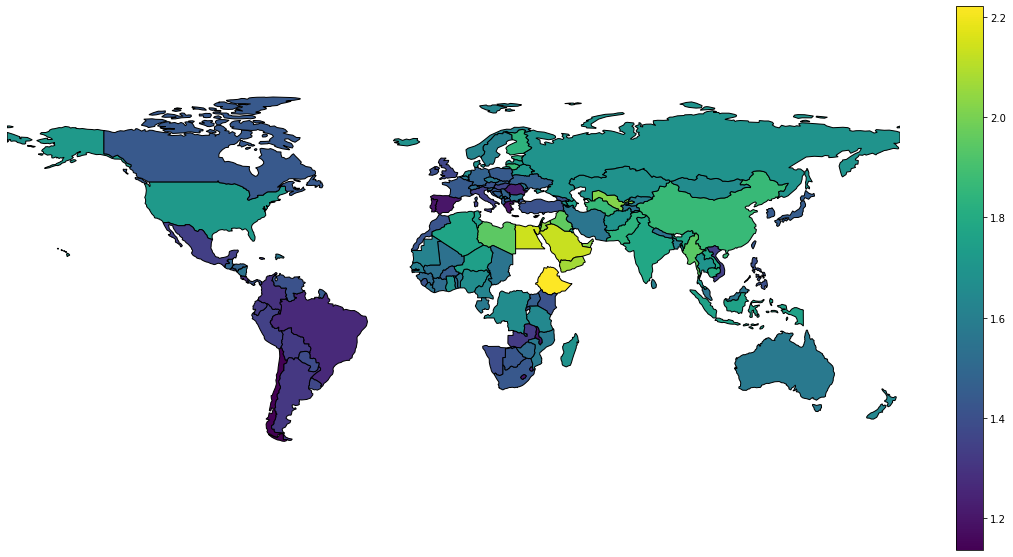

In [8]:
climate_change_threat = data[['Country','Q3']][data.Q3 < 98].groupby('Country').mean()
fullData = geoData.merge(climate_change_threat, left_on=['admin'], right_on=['Country'])
gplt.choropleth(fullData, hue='Q3', legend=True, figsize=(20,10))

1 Very serious threat<br>
2 Somewhat serious threat<br>
3 Not a threat at all

### Well Prepared to Deal With a Disaster: The National Government

/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

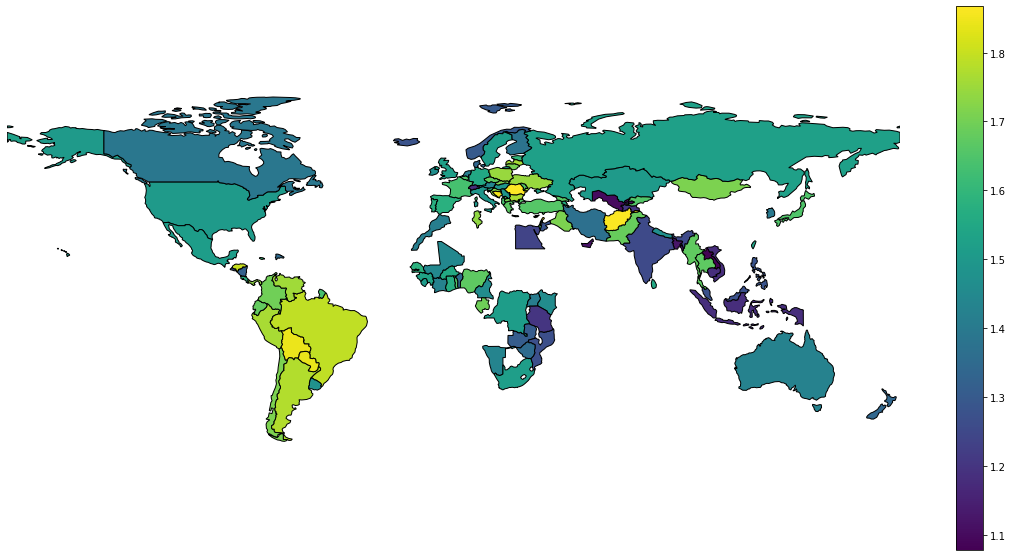

In [9]:
govt_prepared_for_disaster = data[['Country','Q16A']].replace(" ",100).astype({"Q16A":int})
govt_prepared_for_disaster = govt_prepared_for_disaster[govt_prepared_for_disaster.Q16A < 3].groupby('Country').mean()
fullData = geoData.merge(govt_prepared_for_disaster, left_on=['admin'], right_on=['Country'])
gplt.choropleth(fullData, hue='Q16A', legend=True, figsize=(20,10))

1 Yes, well prepared <br>
2 No, not well prepared

### Experienced a Disaster in Past Five Years

/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

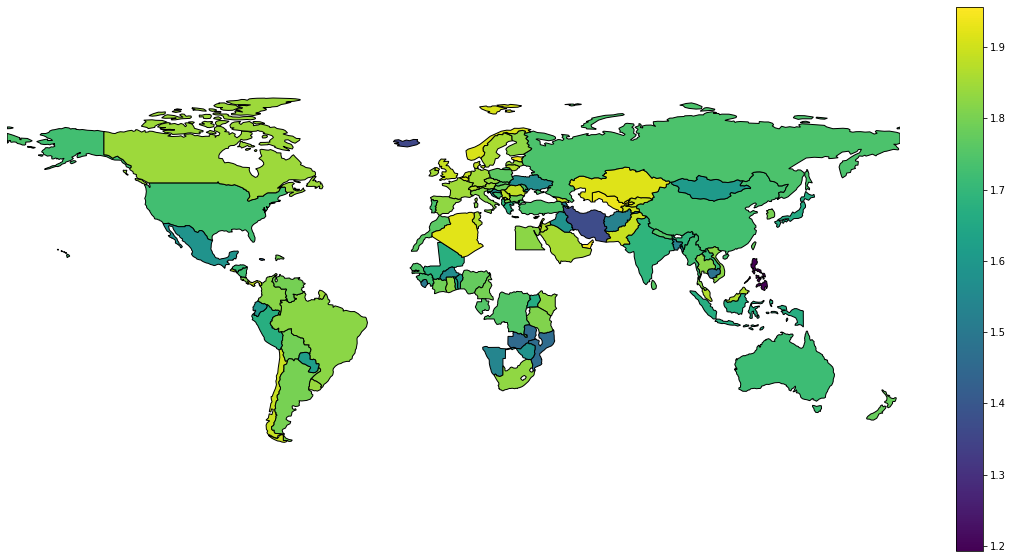

In [10]:
experienced_disaster_in_past_5 = data[['Country','Q17']].replace(" ",100).astype({"Q17":int})
experienced_disaster_in_past_5 = experienced_disaster_in_past_5[experienced_disaster_in_past_5.Q17 < 3].groupby('Country').mean()
fullData = geoData.merge(experienced_disaster_in_past_5, left_on=['admin'], right_on=['Country'])
gplt.choropleth(fullData, hue='Q17', legend=True, figsize=(20,10))

1 Yes <br>
2 No

### Could Protect Yourself or Family in a Future Disaster

/home/ra414/.local/lib/python3.8/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

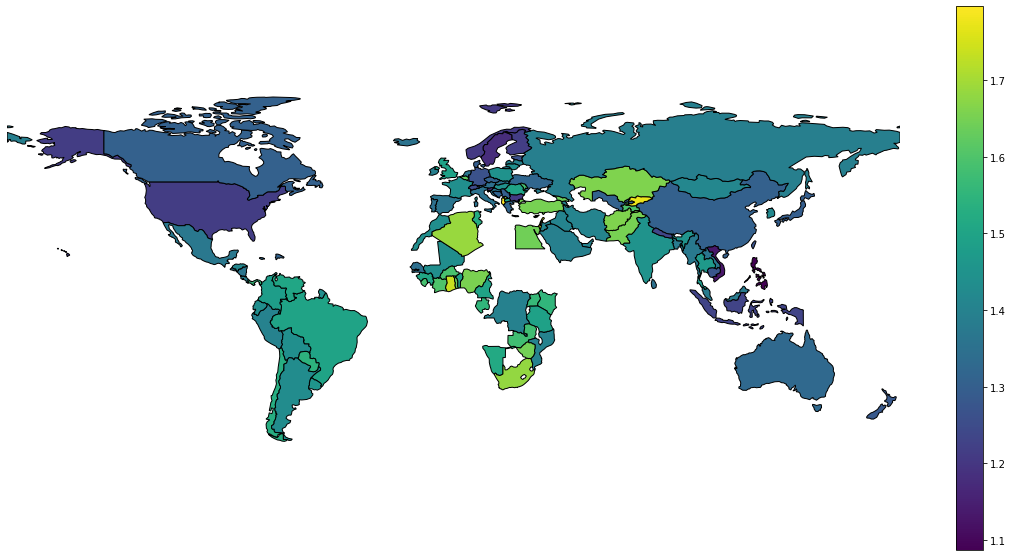

In [11]:
could_protect = data[['Country','Q20']].replace(" ",100).astype({"Q20":int})
could_protect = could_protect[could_protect.Q20 < 3].groupby('Country').mean()
fullData = geoData.merge(could_protect, left_on=['admin'], right_on=['Country'])
gplt.choropleth(fullData, hue='Q20', legend=True, figsize=(20,10))

1 Yes <br>
2 No

In [12]:
df = pd.merge(climate_change_threat,govt_prepared_for_disaster,on='Country')
df = pd.merge(df,experienced_disaster_in_past_5,on='Country')
df = pd.merge(df,could_protect,on='Country')
df = df.rename(columns={"Q3":"Climate_Change_Threat", "Q16A":"Gov_Prep", "Q17":"Felt_Disaster", "Q20":"Could_Protect"})


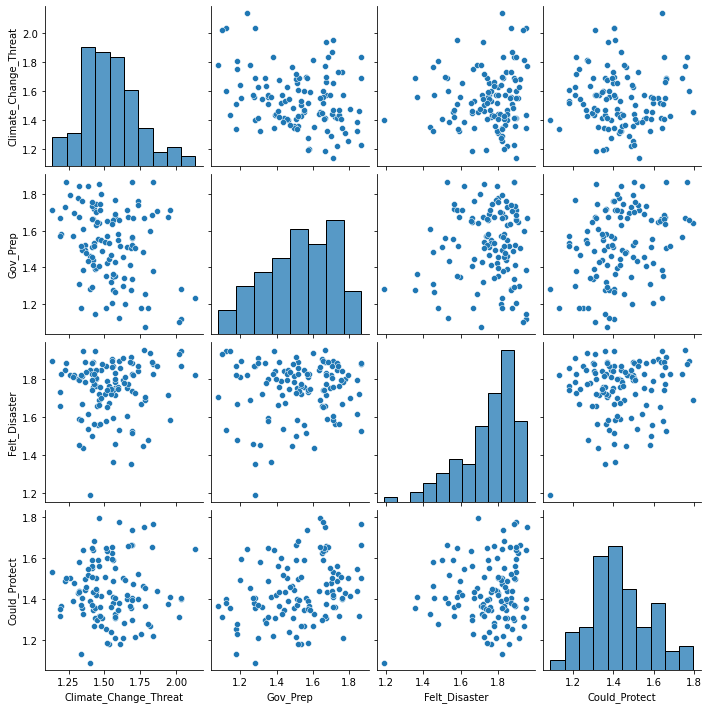

In [13]:
import seaborn as sns
sns.pairplot(df)


In [14]:
df.corr()

,Climate_Change_Threat,Gov_Prep,Felt_Disaster,Could_Protect
Climate_Change_Threat,1.000000,-0.284815,0.071202,0.006397
Gov_Prep,-0.284815,1.000000,0.069377,0.294686
Felt_Disaster,0.071202,0.069377,1.000000,0.134577
Could_Protect,0.006397,0.294686,0.134577,1.000000


#### Units of analysis are countries
Smaller values of Climate_Change_Threat = more concerned, larger = less concerned<br>
Smaller values of Gov_prep = well prepared, larger = less prepared<br>
Smaller values of Felt_Disaster = yes, larger = No<br>
Smaller values of Could_Protect = yes, larger = No<br><br>
-ve association -0.27 =><br>
As Gov_prep goes up,     Climate_Change_Threat goes down =><br>
#### When the government is less prepared, climate change concern goes up!

+ve association +0.29 =><br>
As Gov_prep goes up,     Could_protect goes up =><br>
#### When the government is less prepared, people feel less able to protect their families from disaster

small association 0.07
#### Experience of a disaster has little effect on climate change concern

In [26]:
climate_change_indiv = data[['Q3','Gender','Education','IncomeFeelings','Urbanicity']].query( "Q3 < 98 & Education < 9 & IncomeFeelings < 5 & Urbanicity < 9" )
climate_change_indiv.corr()


,Q3,Gender,Education,IncomeFeelings,Urbanicity
Q3,1.000000,-0.026715,-0.079182,-0.017483,-0.019640
Gender,-0.026715,1.000000,-0.040934,0.036087,-0.003837
Education,-0.079182,-0.040934,1.000000,-0.328556,0.218492
IncomeFeelings,-0.017483,0.036087,-0.328556,1.000000,-0.116608
Urbanicity,-0.019640,-0.003837,0.218492,-0.116608,1.000000


At the individual level all these correlations with Q3 (climate change concern) are weak. Only strong-ish correlation is Education (higher equals more) is anti-correlated with IncomeFeelings (higher is worse) => more education means better income (unsurprising). And more urban means more education (unsurprising).

In [30]:
climate_change_country = data[['Country','Q3','Gender','Education','IncomeFeelings','Urbanicity']].query( "Q3 < 98 & Education < 9 & IncomeFeelings < 5 & Urbanicity < 9" ).groupby('Country').mean()
climate_change_country.corr()


,Q3,Gender,Education,IncomeFeelings,Urbanicity
Q3,1.000000,-0.268069,-0.003133,-0.037998,0.117027
Gender,-0.268069,1.000000,-0.102815,0.047460,-0.204689
Education,-0.003133,-0.102815,1.000000,-0.752128,0.555557
IncomeFeelings,-0.037998,0.047460,-0.752128,1.000000,-0.373757
Urbanicity,0.117027,-0.204689,0.555557,-0.373757,1.000000


Correlations get stronger when grouping by country (Education and IncomeFeelings effect is very strong for example). Reasonable correlation (-0.27) between countries with more female responses => smaller Q3 = more concerned about climate.

We must be very careful about the **ecological fallacy** here i.e. this does not mean women are more concerned about climate than men! https://en.wikipedia.org/wiki/Ecological_fallacy
